데브코스 4기 3차 팀 프로젝트 구성원 이관민 EDA 

In [36]:
#import libraries
import numpy as np
import pandas as pd
import pickle
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score,r2_score,mean_absolute_error,mean_squared_error,accuracy_score,classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv("train.csv", index_col='id')

In [38]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
id,,,,,,,,,,,,
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1


대회 데이터셋에는 각 행에 대한 설명이 따로 적혀있진 않아서 그냥 이름 그대로 해석했습니다 

마지막 loan_status는 1이 승인 0이 미승인으로 생각했습니다



In [39]:
df[df['loan_status']==0].describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,50295.000000,5.029500e+04,50295.000000,50295.000000,50295.000000,50295.000000,50295.000000,50295.0
mean,27.553634,6.667287e+04,4.863048,8888.883229,10.258767,0.145105,5.818531,0.0
std,5.980022,3.931438e+04,3.948375,5328.359771,2.827052,0.077867,4.001945,0.0
min,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.0
25%,23.000000,4.500000e+04,2.000000,5000.000000,7.510000,0.080000,3.000000,0.0
50%,26.000000,6.000000e+04,4.000000,8000.000000,10.390000,0.130000,4.000000,0.0
75%,30.000000,8.000000e+04,7.000000,12000.000000,12.420000,0.200000,8.000000,0.0
max,123.000000,1.900000e+06,123.000000,35000.000000,22.110000,0.630000,30.000000,0.0


In [40]:
df[df['loan_status']==1].describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.0
mean,27.534132,48224.661796,3.725030,11197.271856,13.202305,0.244363,5.783593,1.0
std,6.344539,22435.665380,3.887733,6468.214784,3.018438,0.118654,4.189715,0.0
min,20.000000,9600.000000,0.000000,1000.000000,5.420000,0.010000,2.000000,1.0
25%,23.000000,32000.000000,1.000000,6000.000000,11.112500,0.140000,3.000000,1.0
50%,26.000000,44000.000000,3.000000,10000.000000,13.790000,0.250000,4.000000,1.0
75%,30.000000,59000.000000,6.000000,15000.000000,15.580000,0.330000,8.000000,1.0
max,80.000000,397800.000000,123.000000,35000.000000,23.220000,0.830000,30.000000,1.0


In [41]:
arr = df[df['cb_person_default_on_file'] == 'N']['loan_status'].value_counts()
print(arr[1]/arr[0])

0.13008553197266598


In [42]:
arr = df[df['cb_person_default_on_file'] == 'Y']['loan_status'].value_counts()
print(arr[1]/arr[0])

0.4263235535158171


In [43]:
from scipy.stats import pointbiserialr

# point biserial correlation 계산
correlation, p_value = pointbiserialr(df['loan_status'], df['person_income'])

print(f"Point Biserial Correlation: {correlation}")
print(f"P-value: {p_value}")

Point Biserial Correlation: -0.16995618601376092
P-value: 0.0


수익과 대출 승인 여부의 상관 관계입니다 

In [44]:
# point biserial correlation 계산
correlation, p_value = pointbiserialr(df['loan_status'], df['person_emp_length'])

print(f"Point Biserial Correlation: {correlation}")
print(f"P-value: {p_value}")

Point Biserial Correlation: -0.10042827021555922
P-value: 2.6819540145240923e-131


In [47]:
# point biserial correlation 계산
correlation, p_value = pointbiserialr(df['loan_status'], df['loan_amnt'])

print(f"Point Biserial Correlation: {correlation}")
print(f"P-value: {p_value}")

Point Biserial Correlation: 0.1449823702652079
P-value: 6.794856302301832e-273


In [50]:
# point biserial correlation 계산
correlation, p_value = pointbiserialr(df['loan_status'], df['loan_int_rate'])

print(f"Point Biserial Correlation: {correlation}")
print(f"P-value: {p_value}")

Point Biserial Correlation: 0.33894767218478367
P-value: 0.0


    0	    1	    RATE
A	19952	1032	19.33333333
B	18313	2087	8.774796358
C	9542	1494	6.386880857
D	2046	2988	0.684738956
E	378	    631	    0.599049128
F	58	    91	    0.637362637
G	6	    27	    0.222222222

대출 등급별 0과 1 비율입니다

    소득
0	66672.86772
A	67255.74709
B	67003.81489
C	63730.02138
D	69037.27566
E	78814.40741
F	80506.51724
G	93500

1	48224.6618
A	44861.20155
B	46047.00192
C	44676.74096
D	51858.85174
E	52351.33439
F	48615.48352
G	41484.14815

비율 보시면 0이 1보다 소득이 높은 경향이 보입니다

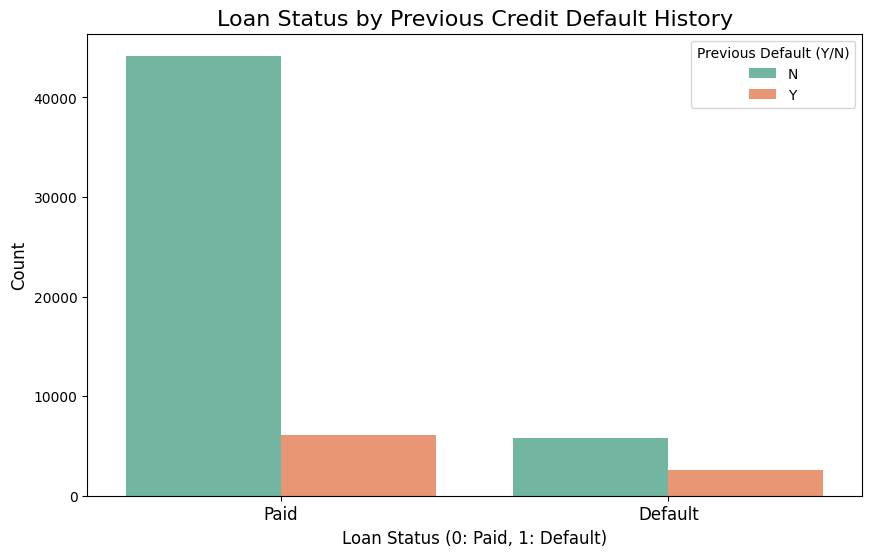

In [12]:
# Count of loan status based on previous default history
plt.figure(figsize=(10, 6))
sns.countplot(x='loan_status', hue='cb_person_default_on_file', data=df, palette='Set2')

# Adding titles and labels for better clarity
plt.title('Loan Status by Previous Credit Default History', fontsize=16)
plt.xlabel('Loan Status (0: Fale, 1: Commit)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Previous Default (Y/N)', fontsize=10)
plt.xticks(ticks=[0, 1], labels=['Paid', 'Default'], fontsize=12)

plt.show()